<a href="https://colab.research.google.com/github/garghimank09/credit-Risk/blob/main/credit_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score

%matplotlib inline

In [ ]:
df = pd.read_csv('/content/bankloans.csv')
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [ ]:
df.isnull().sum()

,0
age,0
ed,0
employ,0
address,0
income,0
debtinc,0
creddebt,0
othdebt,0
default,450


In [ ]:
df.value_counts()

age  ed  employ  address  income  debtinc  creddebt  othdebt   default
56   1   11      20       59      15.0     4.672800  4.177200  0.0        1
20   1   4       0        14      9.7      0.200984  1.157016  1.0        1
     3   0       1        17      2.3      0.043792  0.347208  0.0        1
21   1   1       1        16      6.3      0.141120  0.866880  0.0        1
                          18      17.3     0.158814  2.955186  0.0        1
                                                                         ..
22   1   4       3        14      17.5     0.225400  2.224600  0.0        1
                 2        24      15.6     1.636128  2.107872  1.0        1
                 1        16      1.2      0.084480  0.107520  0.0        1
         1       3        17      18.6     0.806310  2.355690  0.0        1
                 0        18      4.4      0.270072  0.521928  0.0        1
Name: count, Length: 700, dtype: int64

In [ ]:
df = df.dropna()

<Axes: xlabel='age', ylabel='income'>

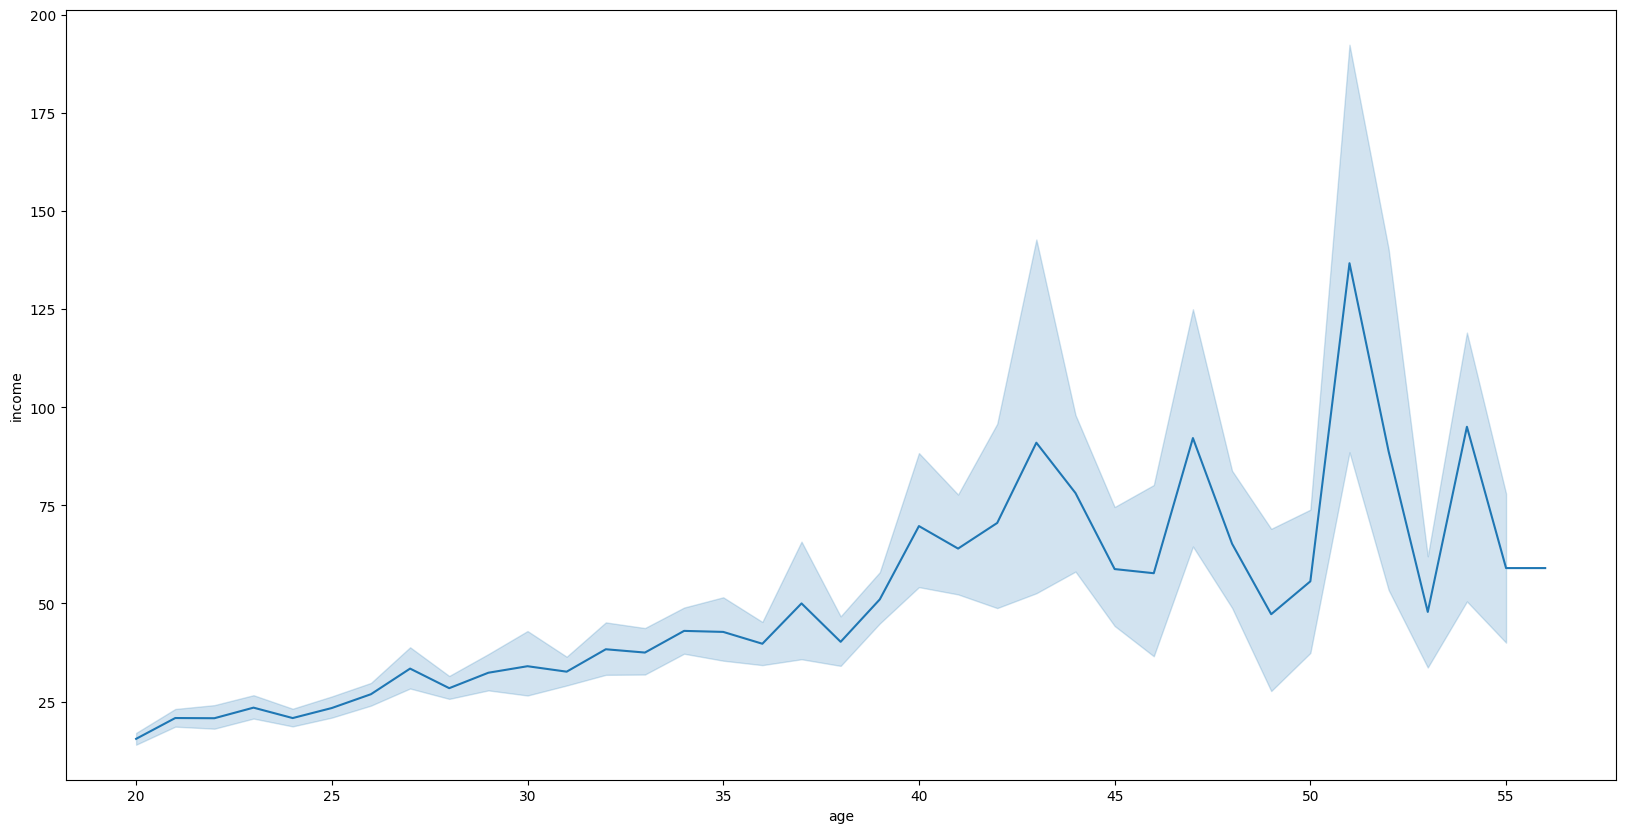

In [ ]:
fig,ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='age',y='income',data=df,ax=ax)

<Axes: xlabel='age', ylabel='debtinc'>

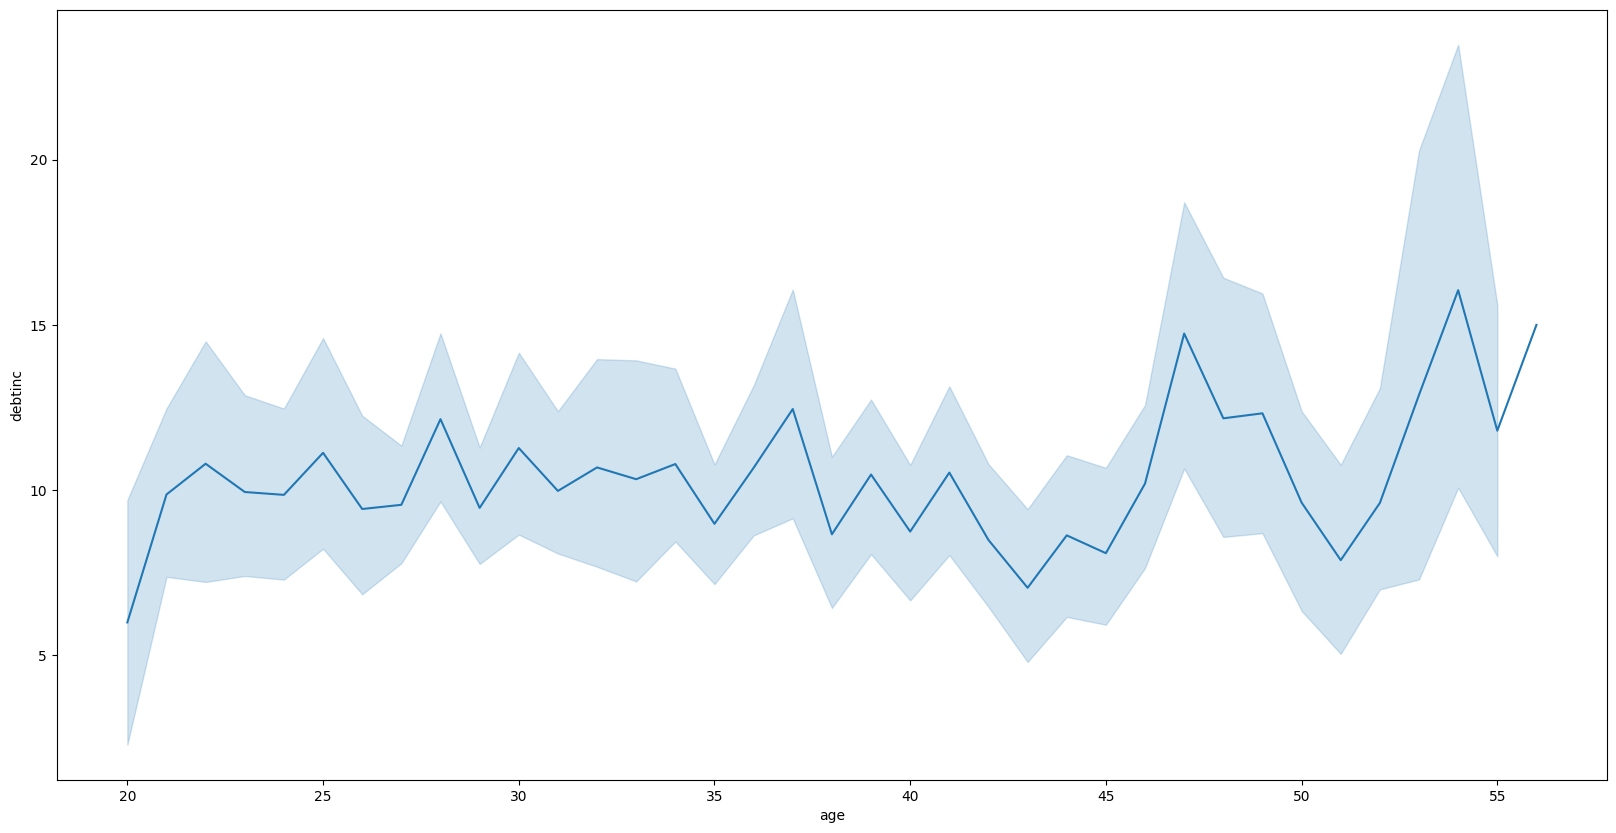

In [ ]:
fig,ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='age',y='debtinc',data=df,ax=ax)

In [ ]:
df['default'].value_counts()

,count
default,
0.0,517
1.0,183


In [ ]:
x=df.drop(['default'],axis=1)
y=df['default']

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
sc = StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

Creating Model


In [ ]:
rfc = RandomForestClassifier(n_estimators=200)

In [ ]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=200)

In [ ]:
rfc.score(xtest,ytest)

0.8142857142857143

In [ ]:
rfc2 = cross_val_score(estimator=rfc,X=xtrain,y=ytrain,cv=10)
rfc2.mean()

np.float64(0.7839285714285714)

SVM


In [ ]:
sv = SVC()
sv.fit(xtrain,ytrain)

SVC()

In [ ]:
sv.score(xtest,ytest)

0.7928571428571428

In [ ]:
model = GridSearchCV(sv,{
    'C':[0.1,0.2,0.4,0.8,1.2,1.8,4.0,7.0],
    'gamma':[0.1,0.4,0.8,1.0,2.0,3.0],
    'kernel':['rbf','linear']
},scoring='accuracy',cv=10)

In [ ]:
model.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.4, 0.8, 1.2, 1.8, 4.0, 7.0],
                         'gamma': [0.1, 0.4, 0.8, 1.0, 2.0, 3.0],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [ ]:
model.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [ ]:
model2 = SVC(C=0.1,gamma=0.1,kernel='linear')
model2.fit(xtrain,ytrain)
model2.score(xtest,ytest)

0.8214285714285714

In [ ]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
lr.score(xtest,ytest)

0.8357142857142857

<Axes: >

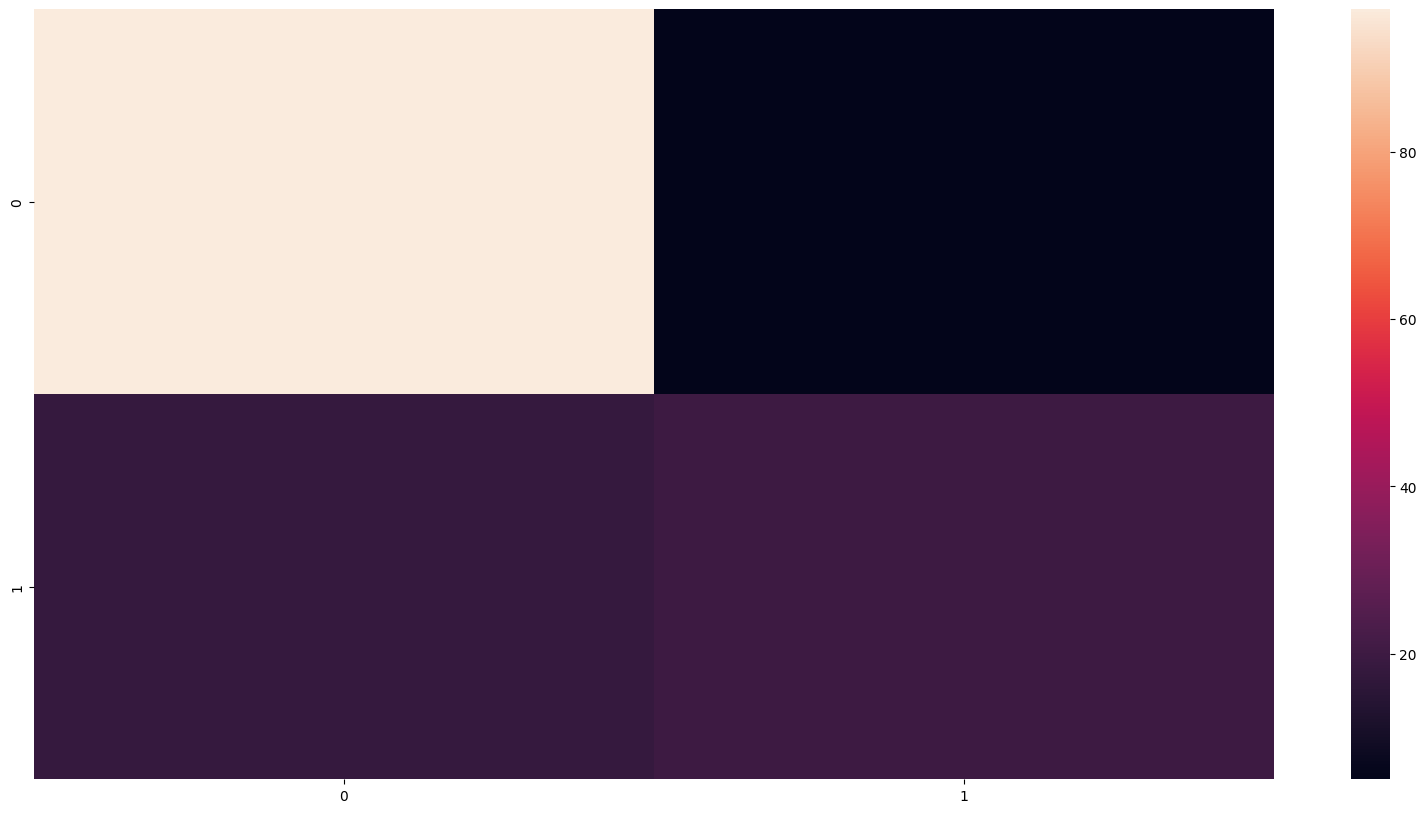

In [ ]:
yp = lr.predict(xtest)
c= confusion_matrix(ytest,yp)
fig ,ax = plt.subplots(figsize=(20,10))
sns.heatmap(c,ax=ax)